# Screen Time and Notifications Analysis Project

This project explores the relationship between screen time and notifications across different apps, analyzing trends and visualizing the data.

## Setup

In [1]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data.xlsx'  # Replace with your file path if needed
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
df.head()


C:\Users\doguk\AppData\Local\Temp\ipykernel_70496\4033028817.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,day,app,time (minutes),pickups,notifications
0,1,total,471,133,387
1,1,youtube,399,60,0
2,1,reddit,230,22,10
3,1,akbank,96,5,7
4,1,whatsapp,63,12,275


## Day-by-Day Analysis of App Time and Notifications

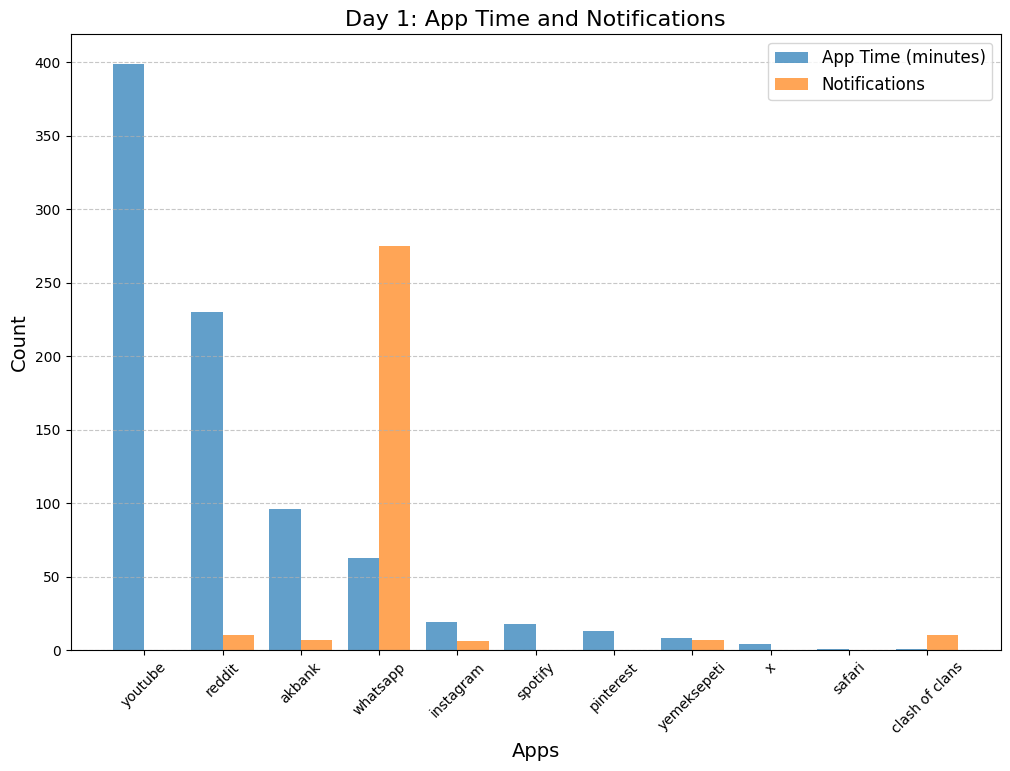

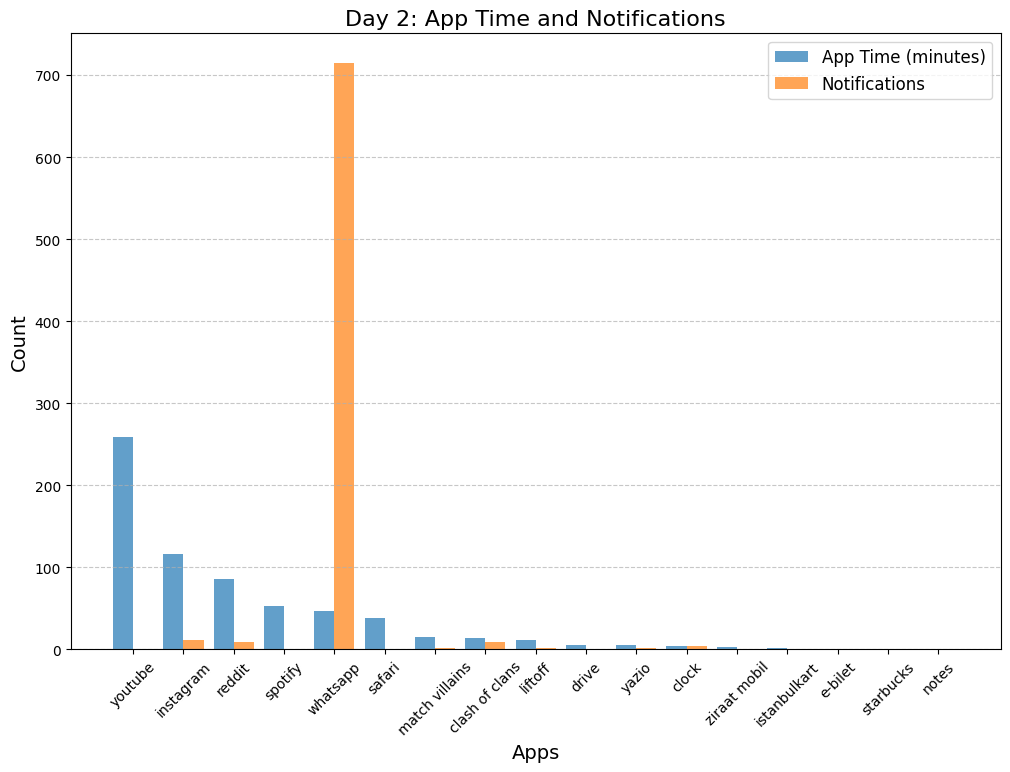

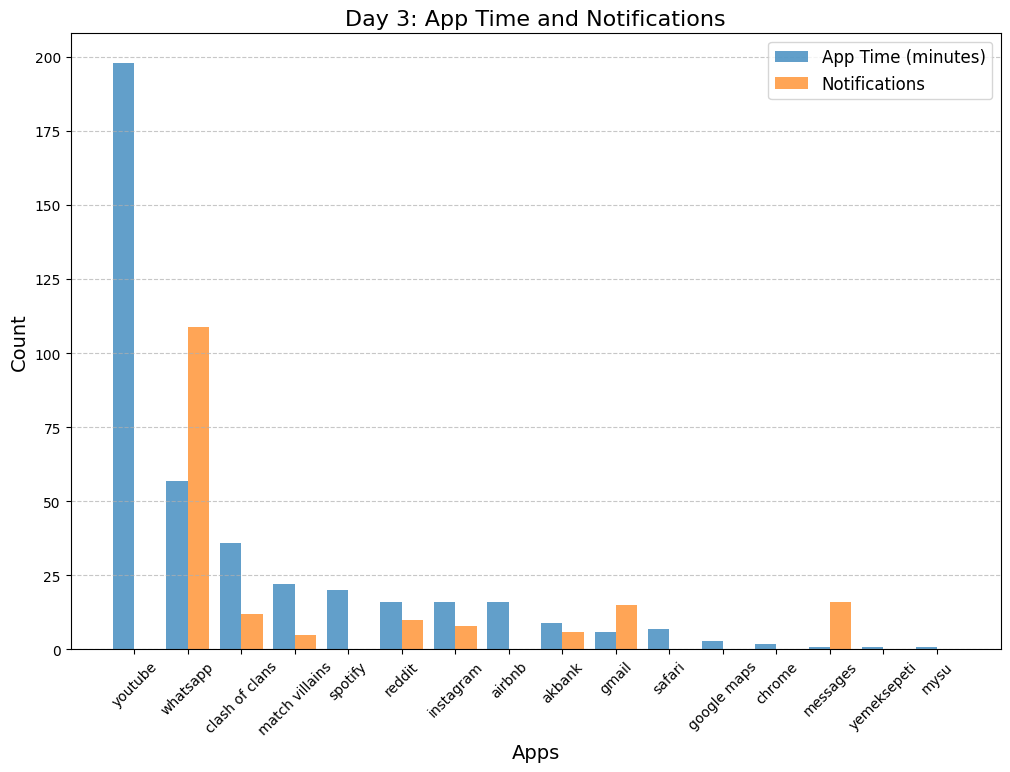

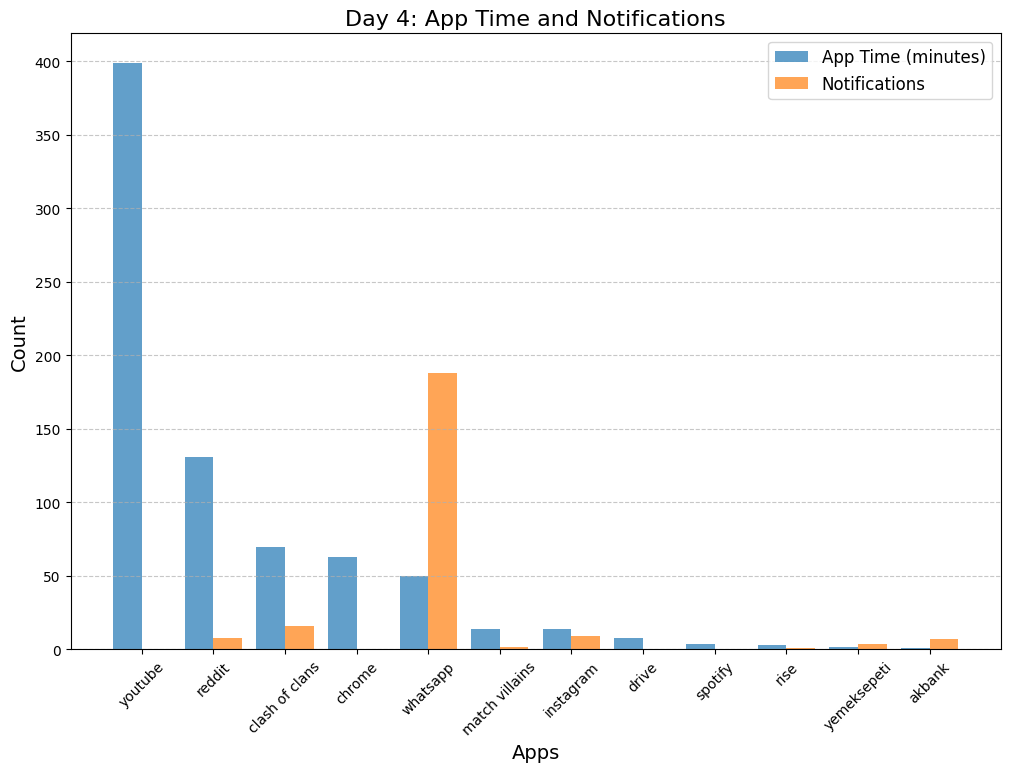

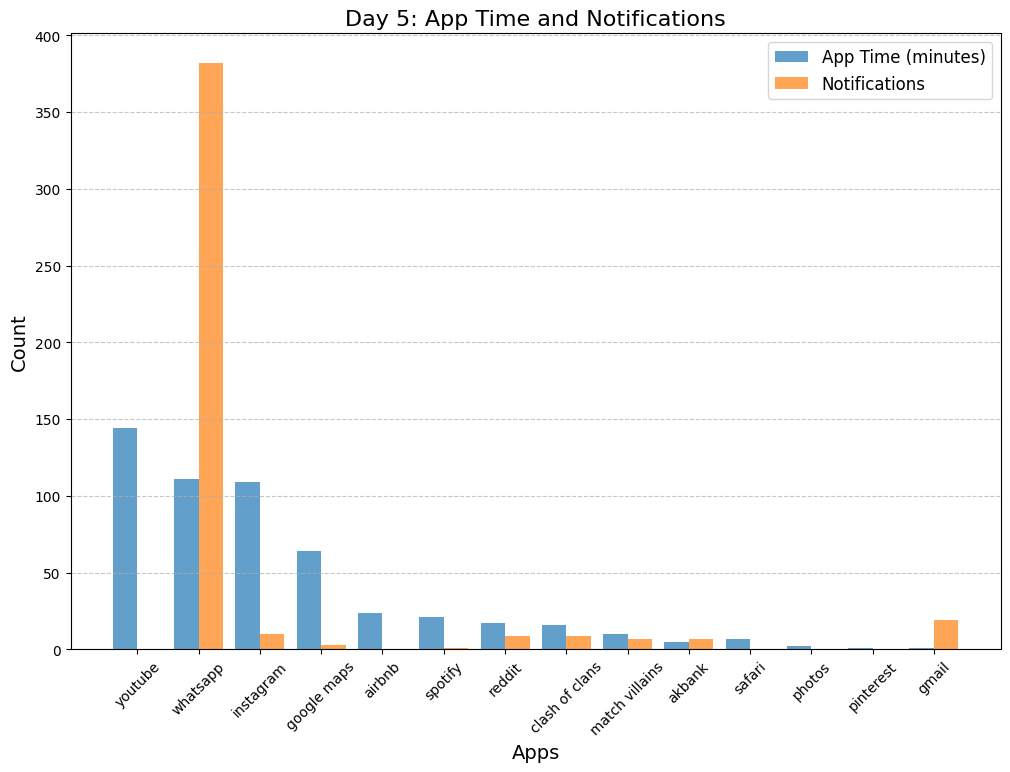

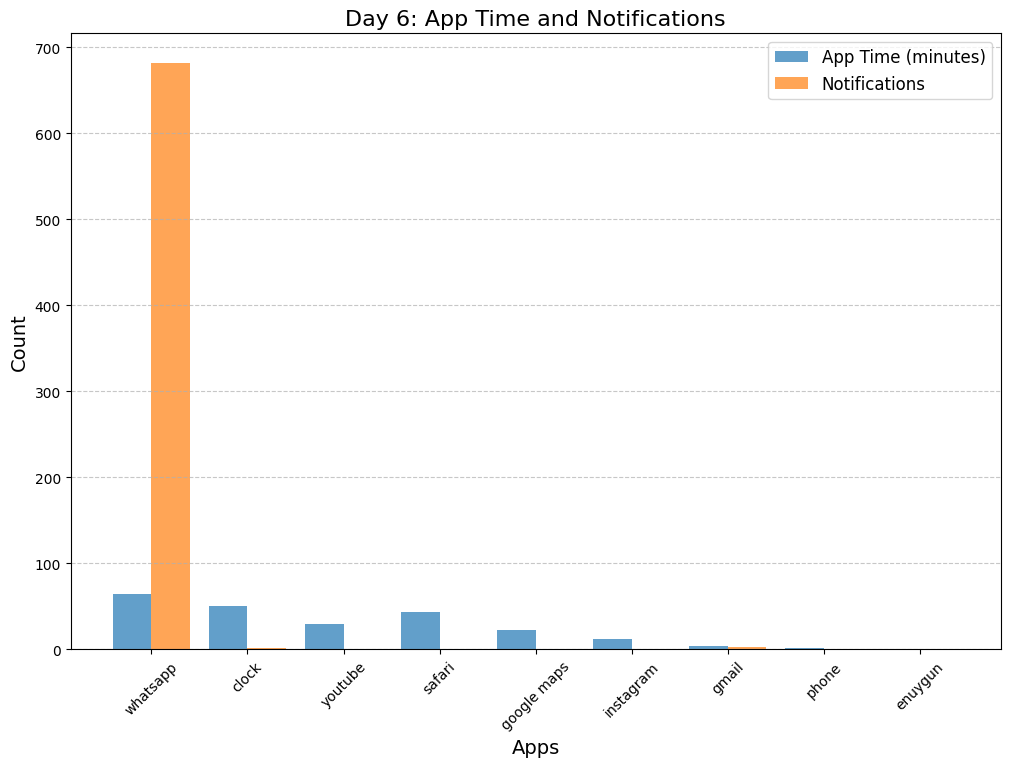

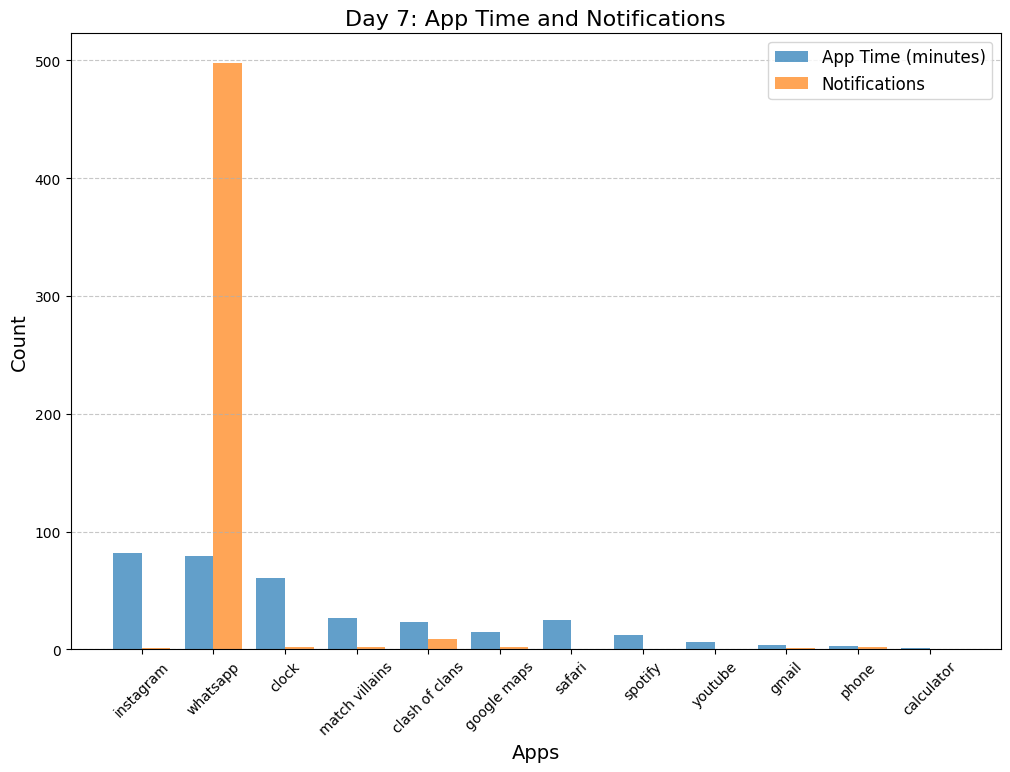

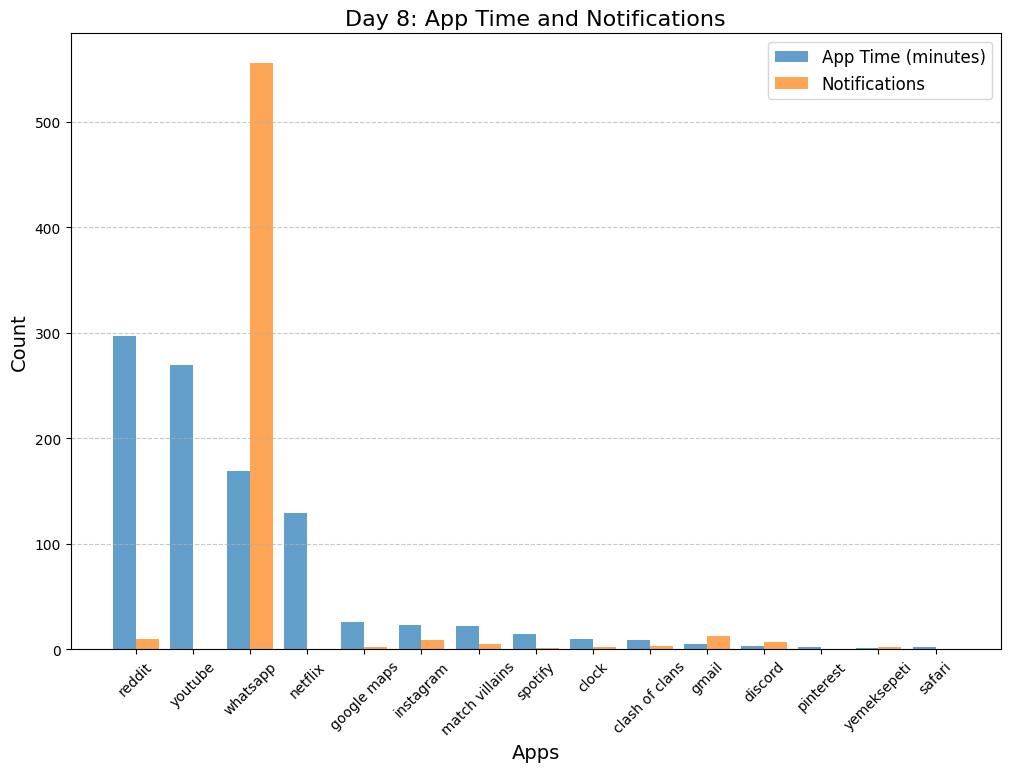

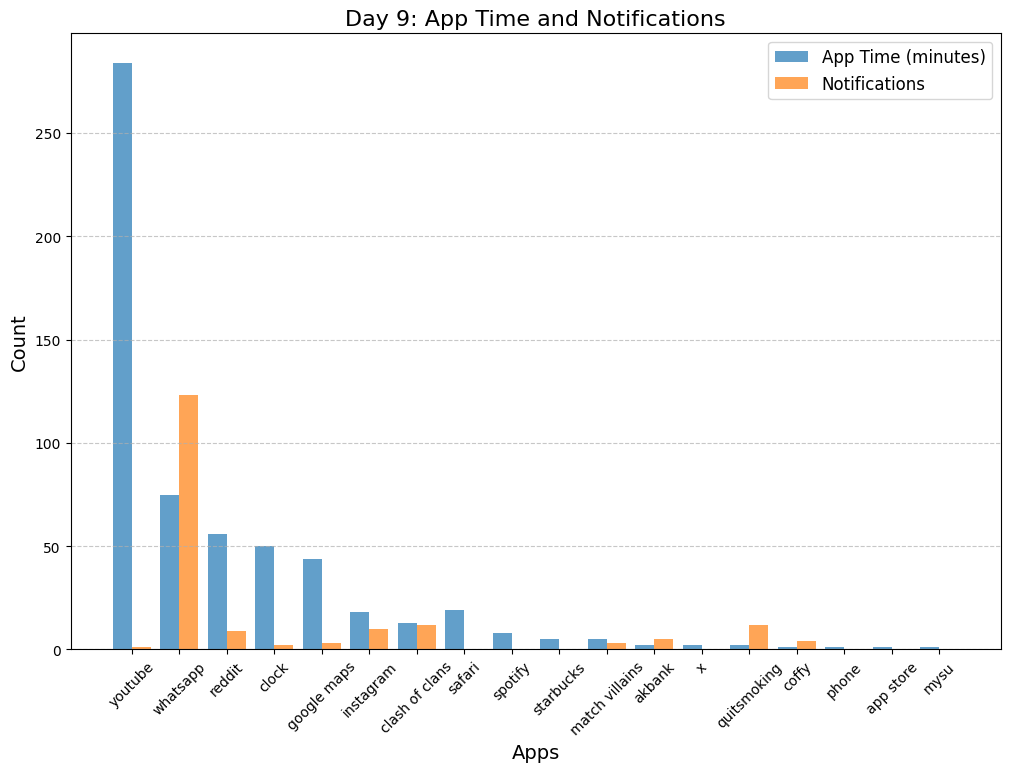

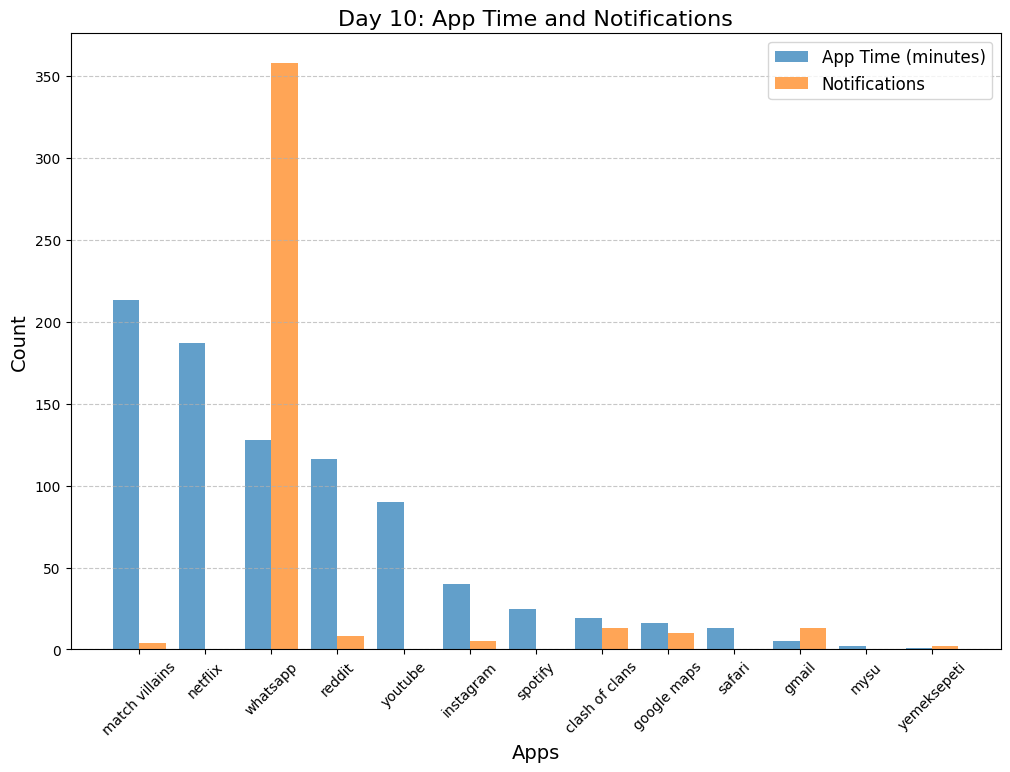

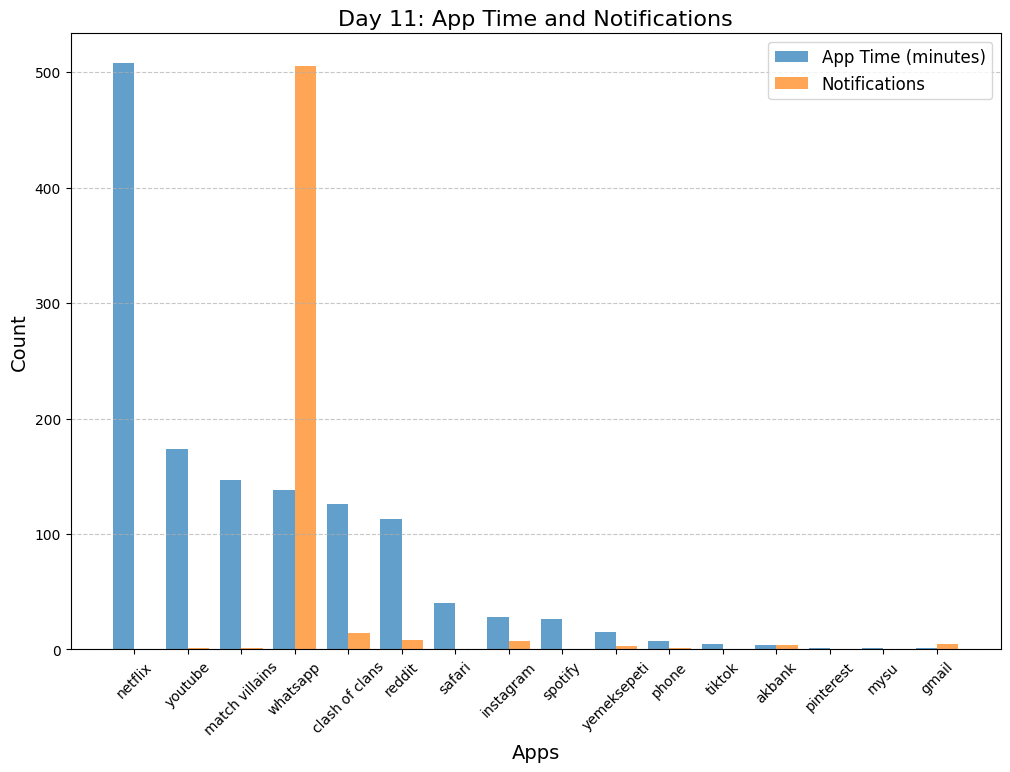

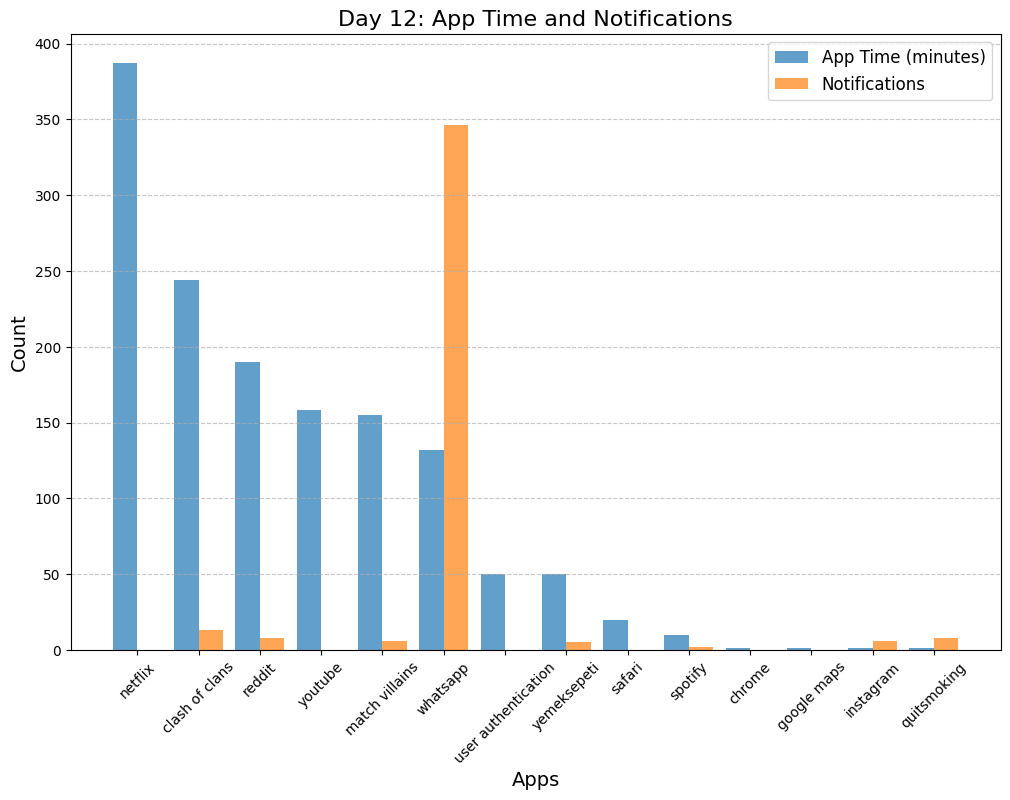

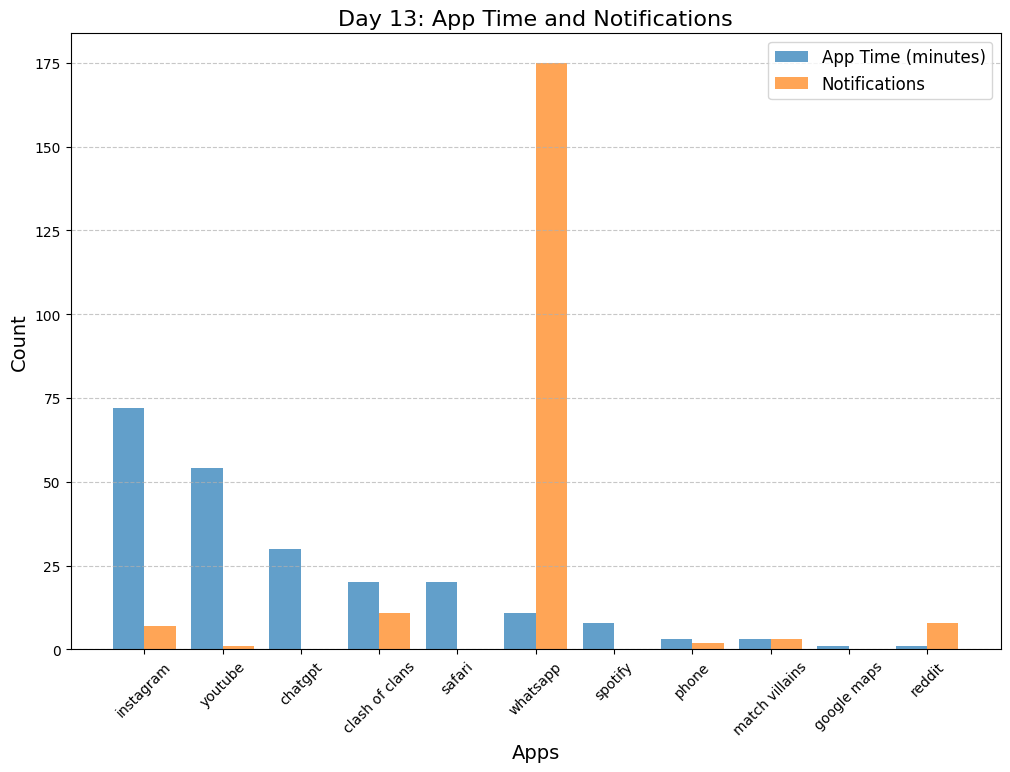

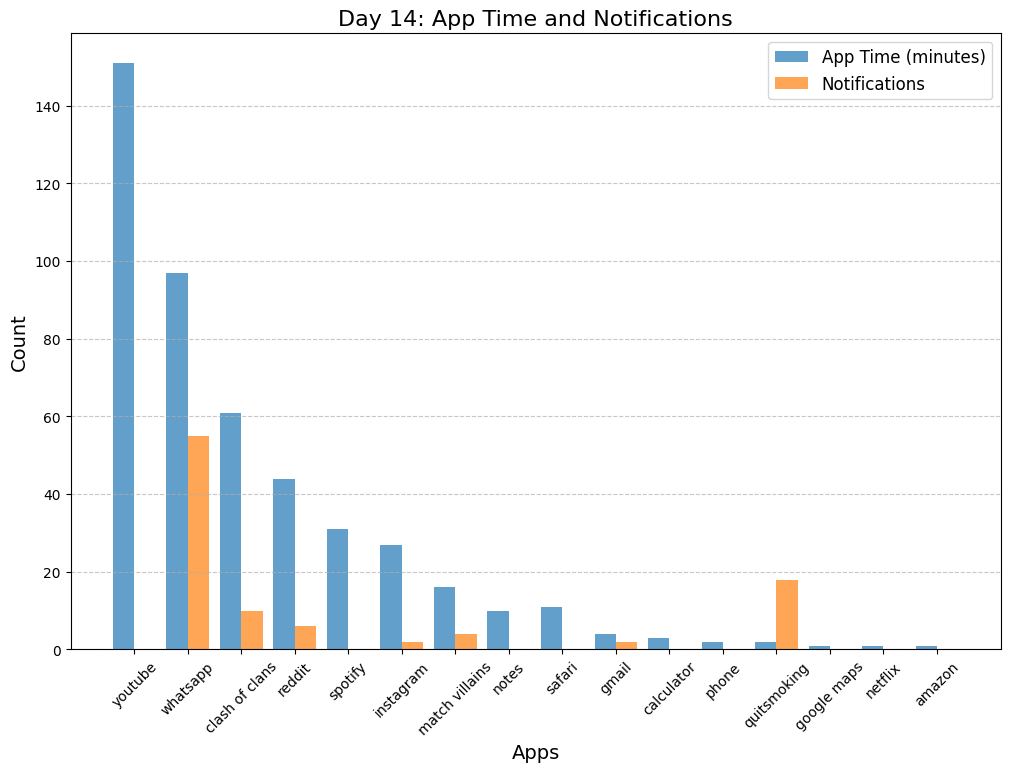

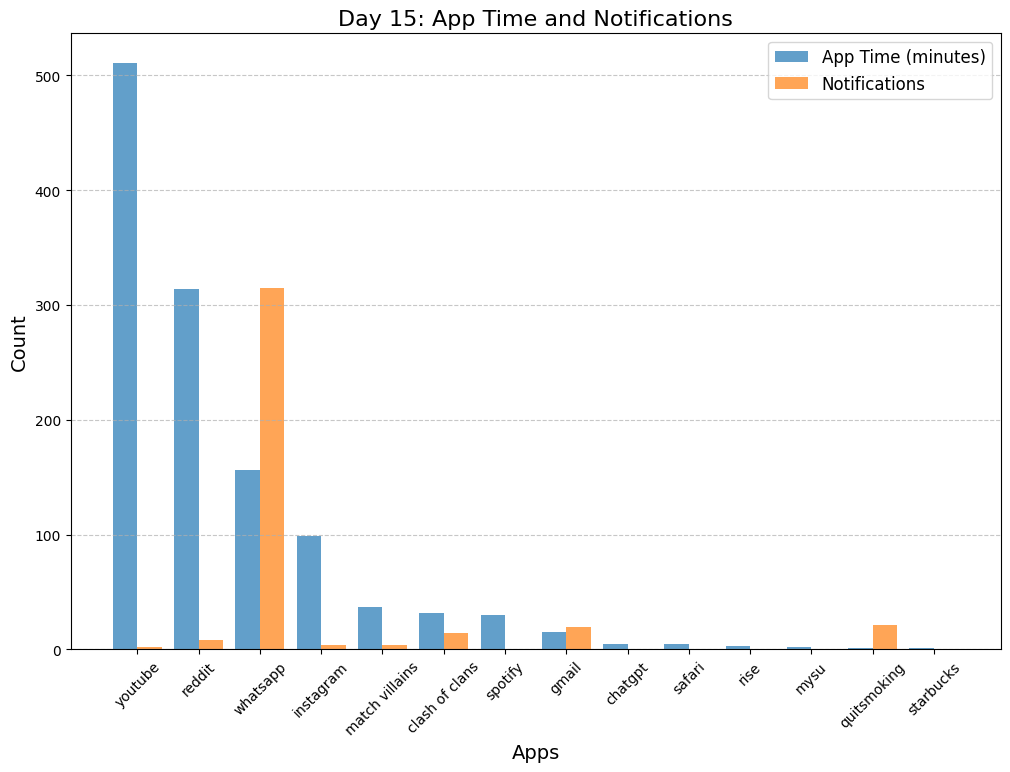

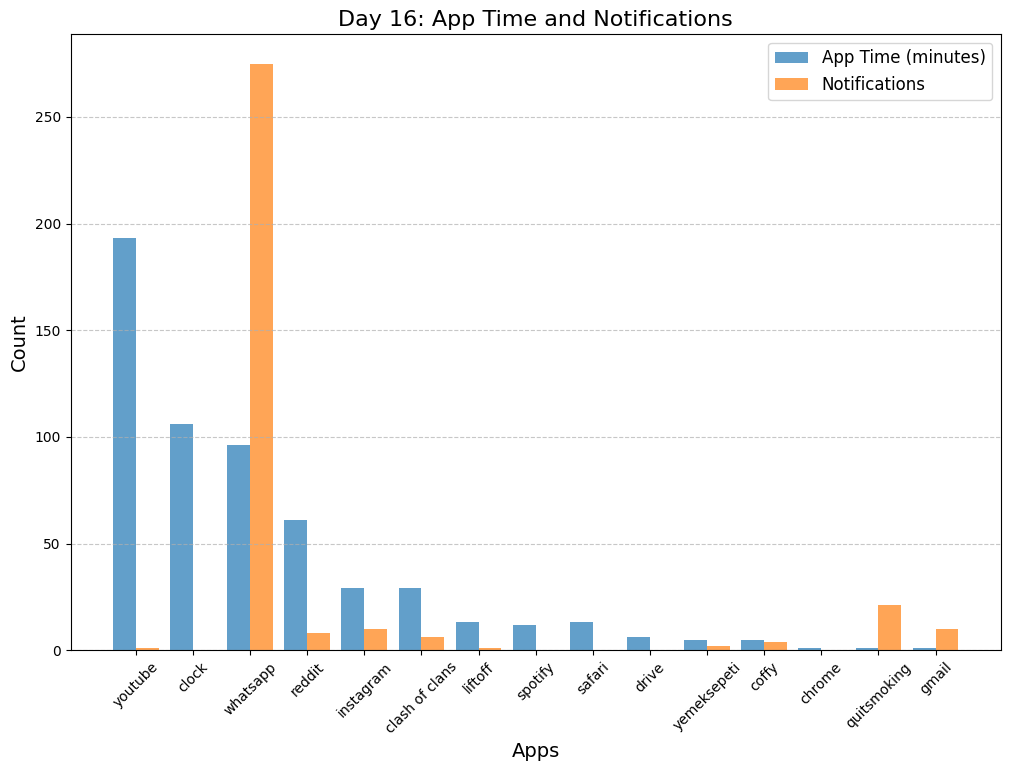

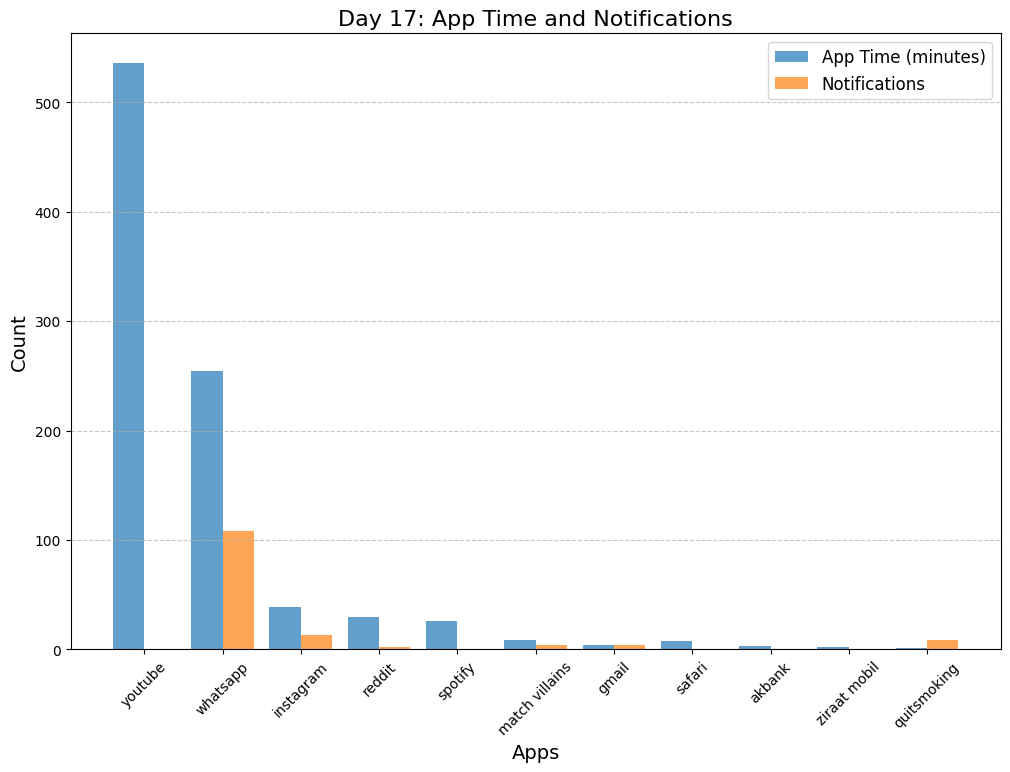

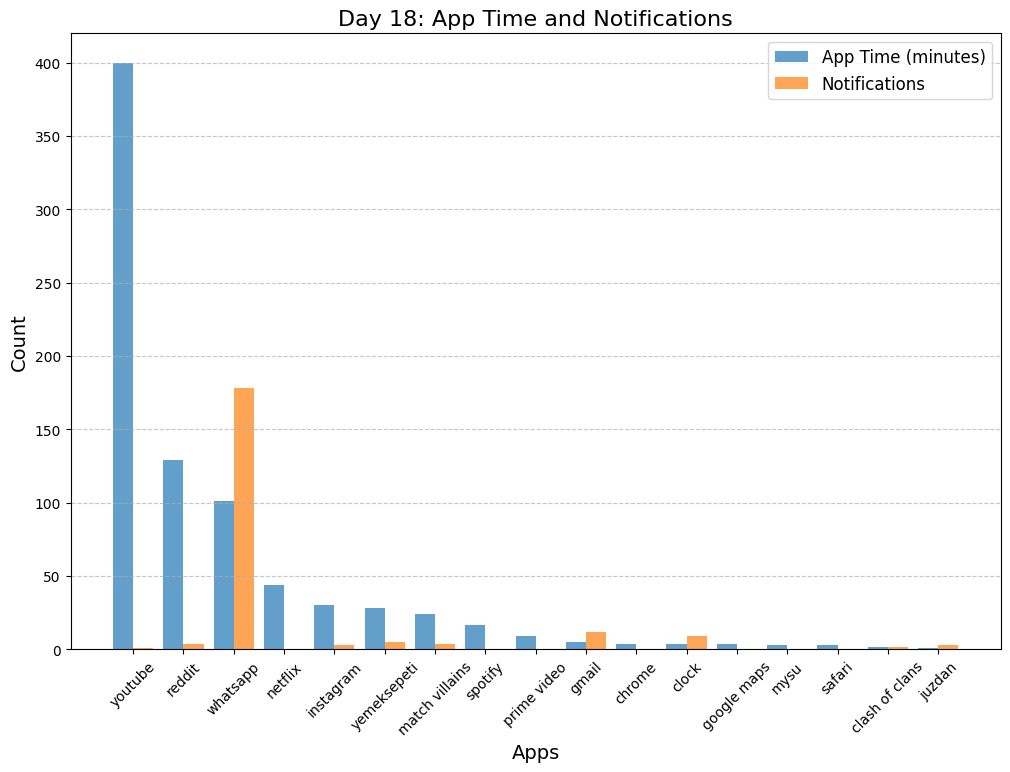

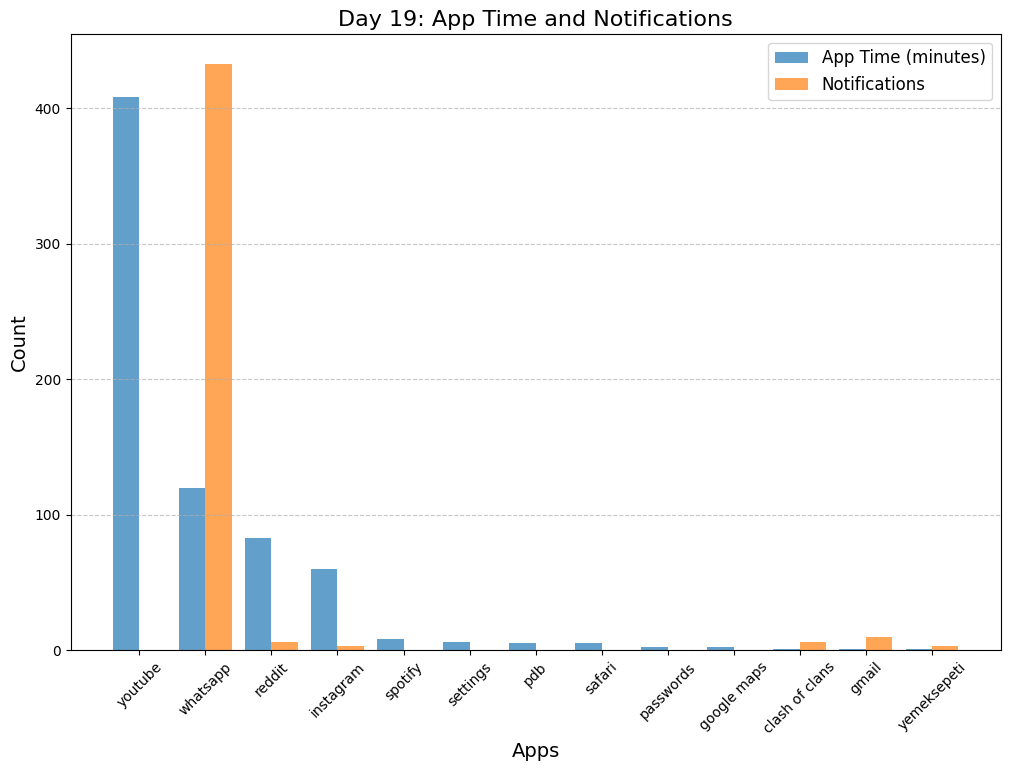

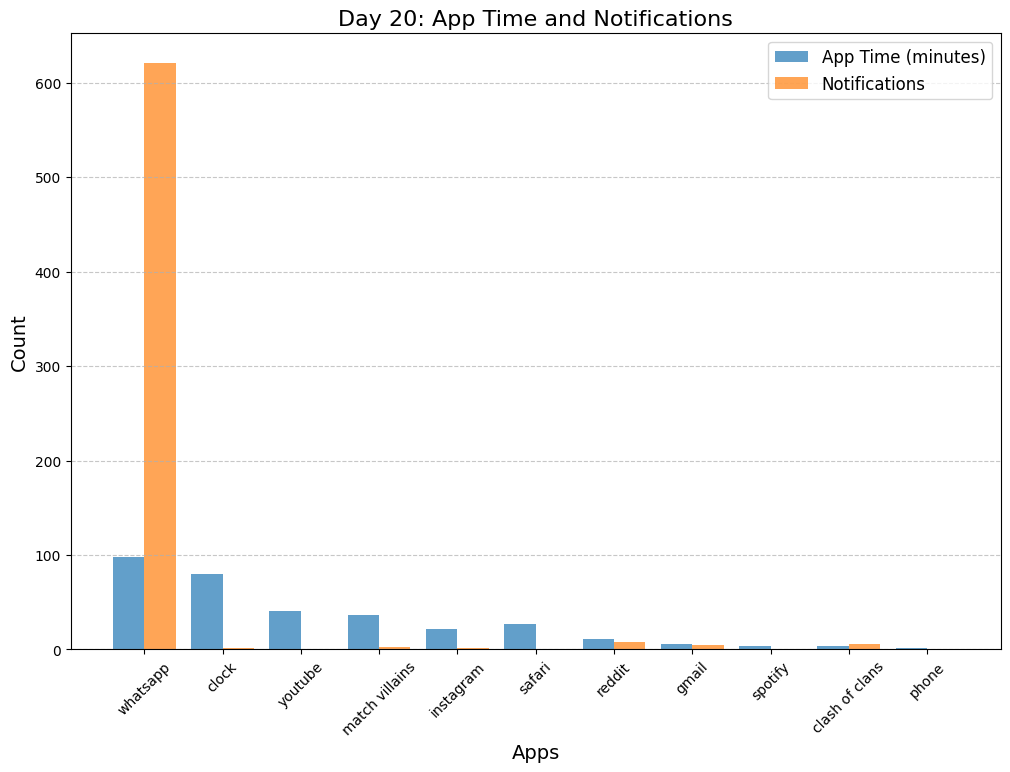

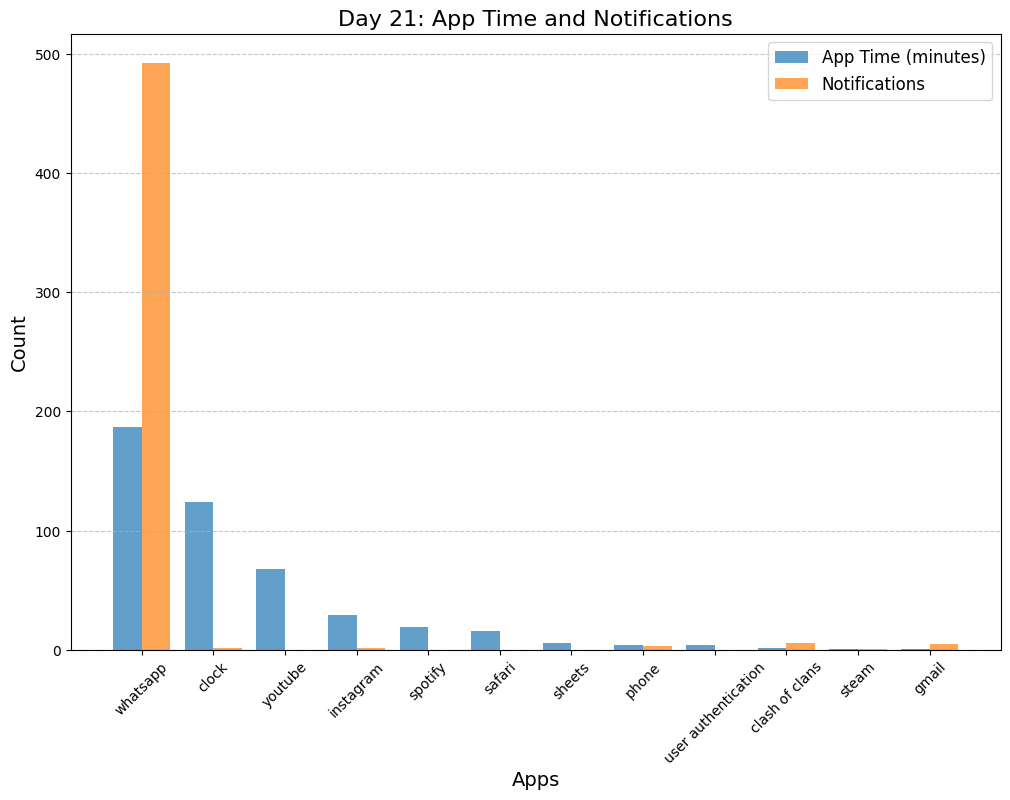

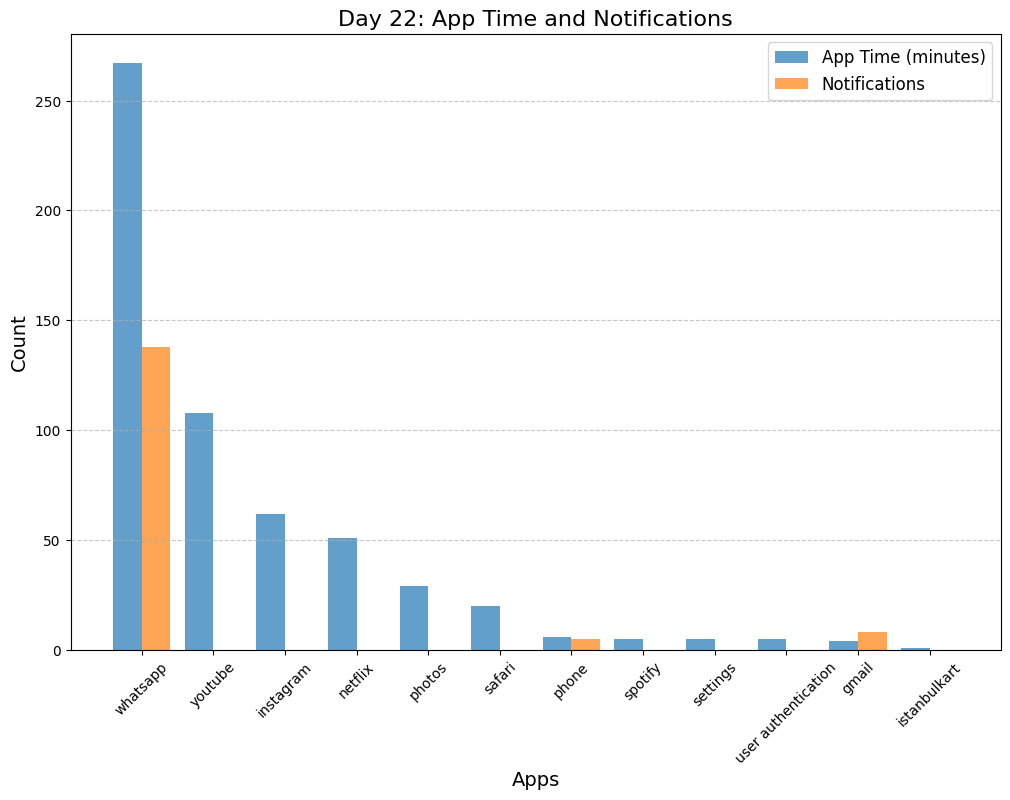

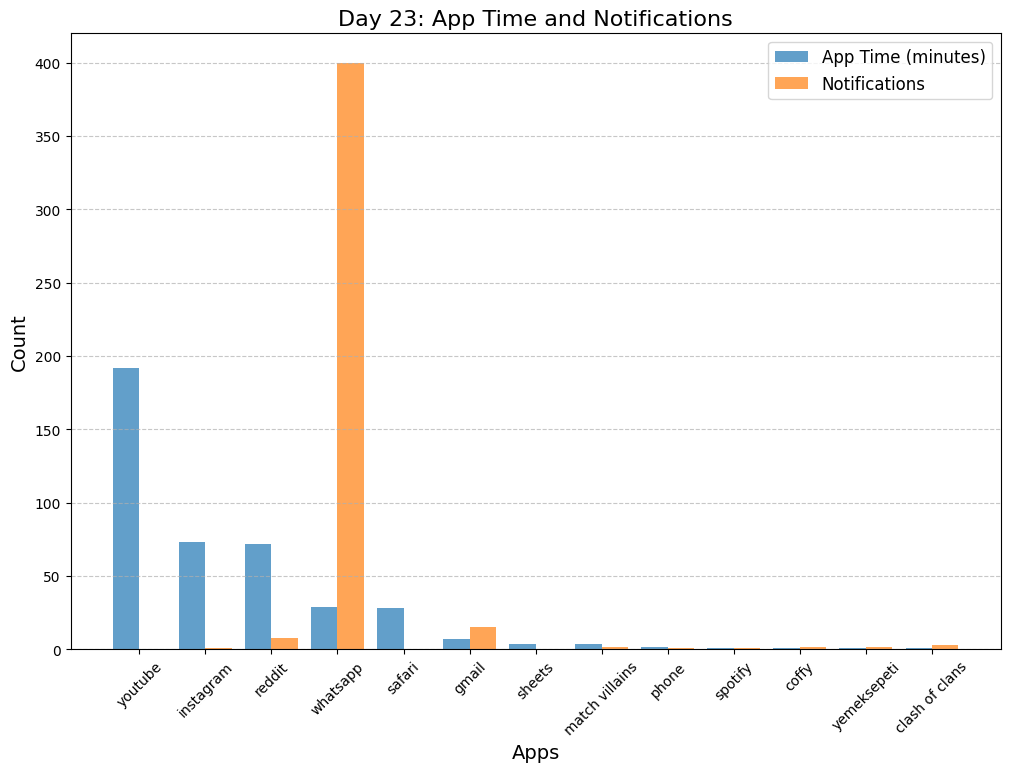

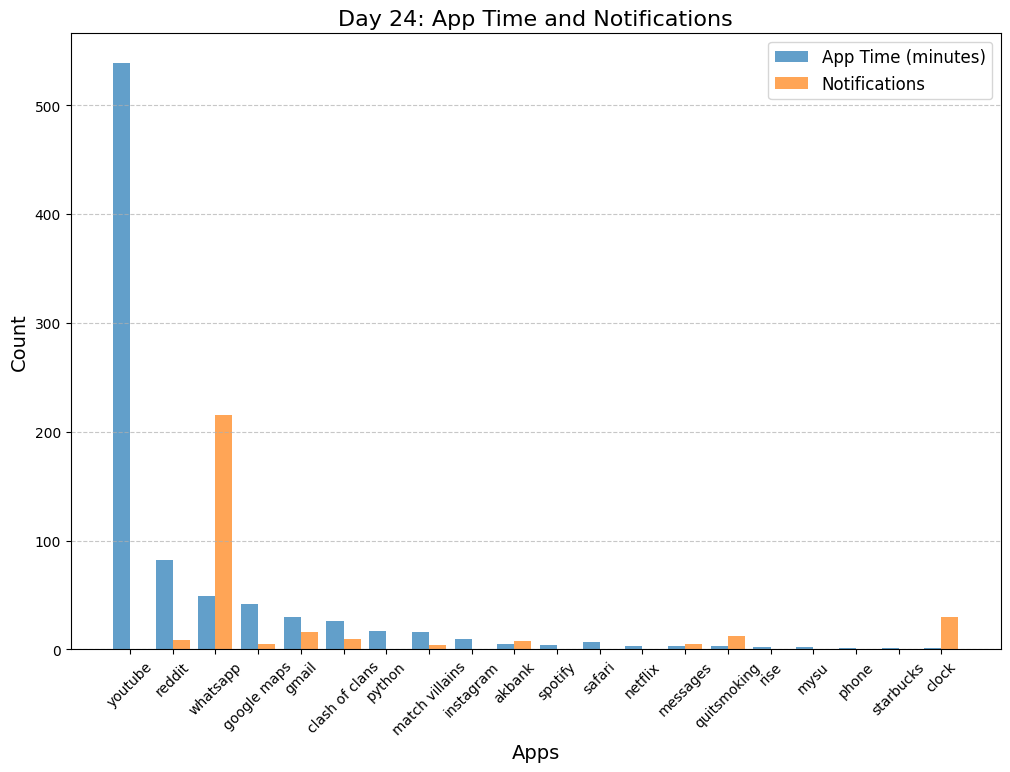

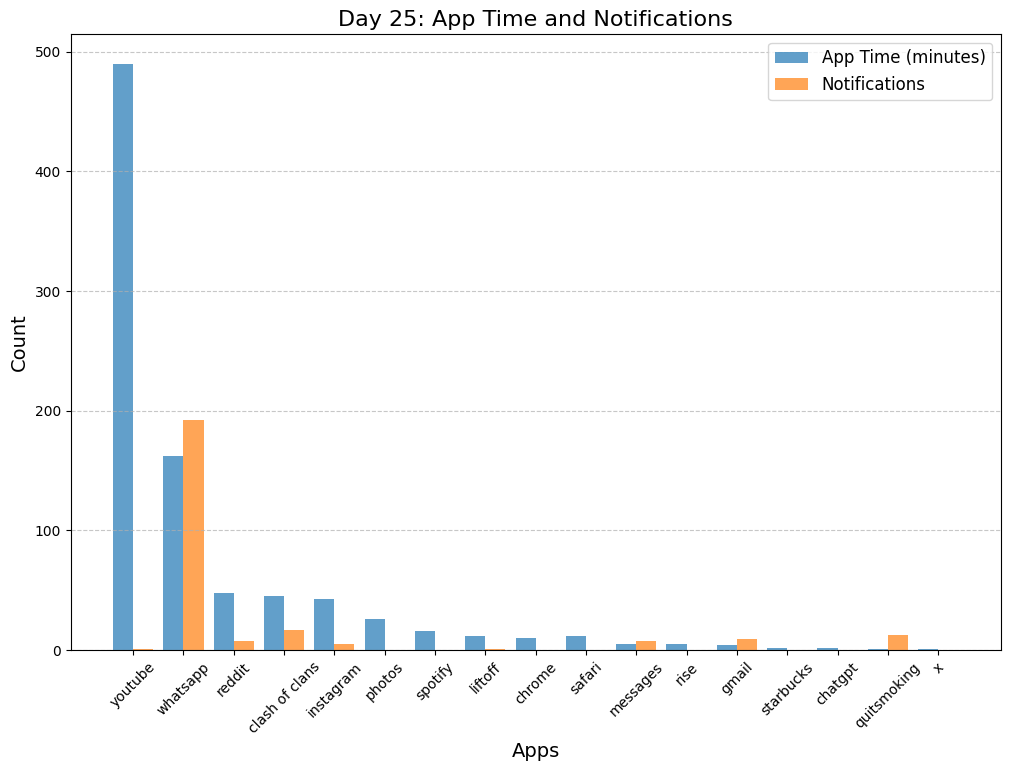

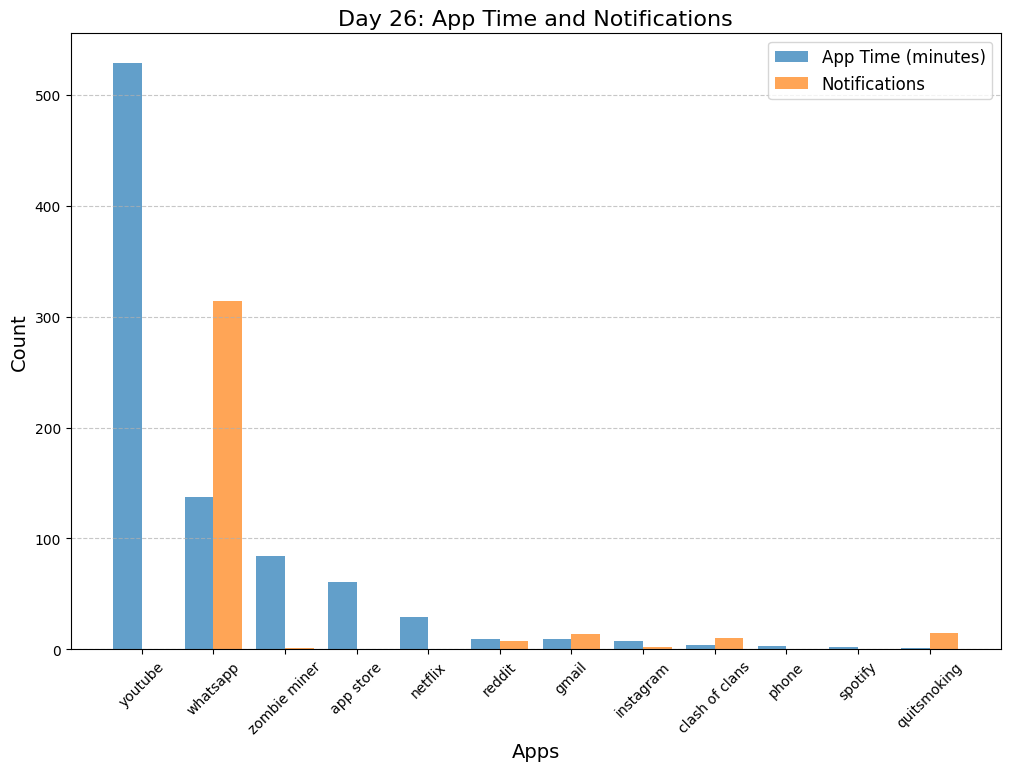

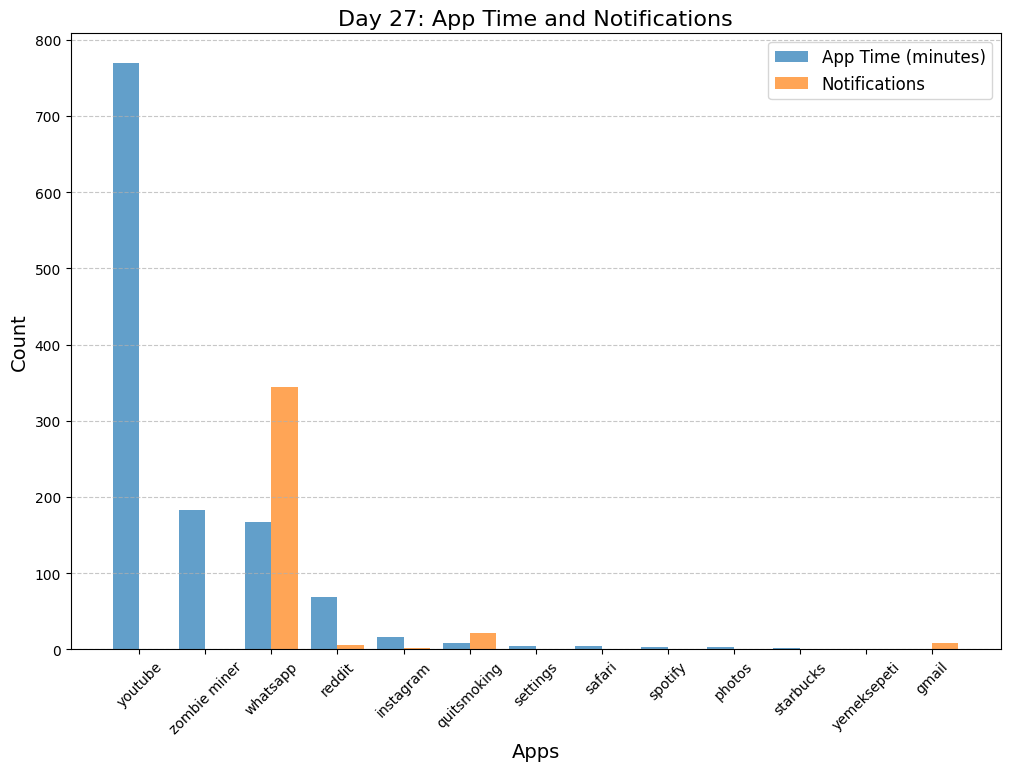

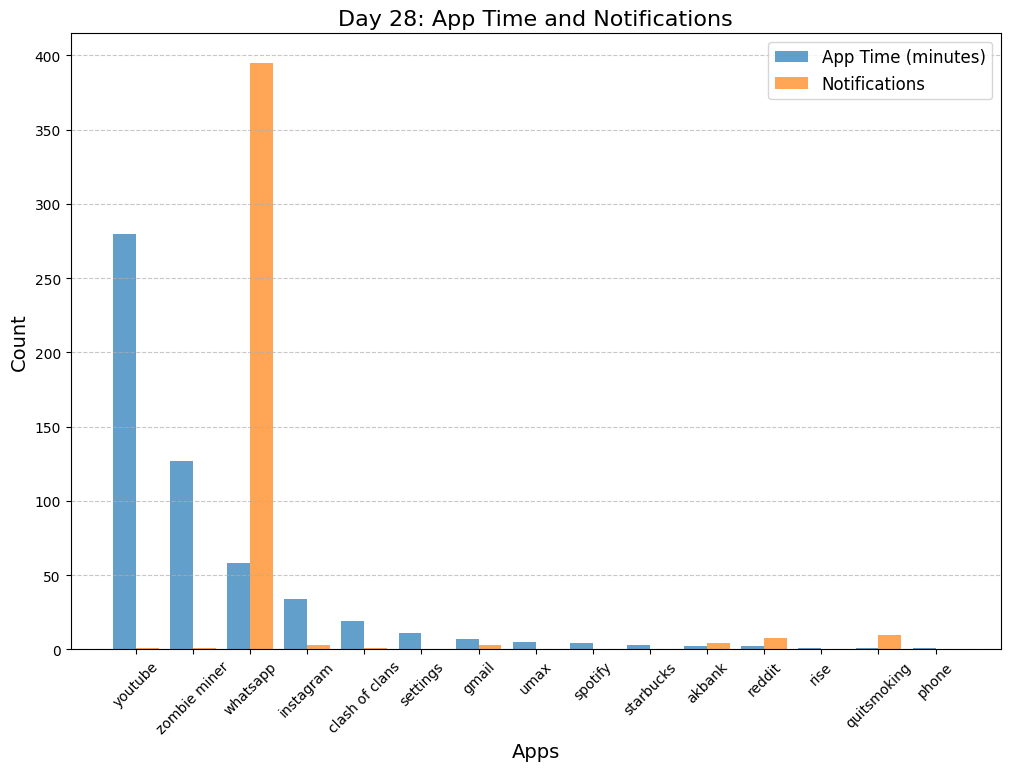

In [2]:

# Filter out the total row to focus on individual app usage
app_data = df[df['app'] != 'total']
unique_days = app_data['day'].unique()

# Plot for each day
for day in unique_days:
    # Filter data for the current day
    day_data = app_data[app_data['day'] == day]
    
    # Create the bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.4
    x = range(len(day_data))
    
    # Plot app times
    plt.bar(x, day_data['time (minutes)'], width=bar_width, label='App Time (minutes)', alpha=0.7)
    
    # Plot notifications
    plt.bar([i + bar_width for i in x], day_data['notifications'], width=bar_width, label='Notifications', alpha=0.7)
    
    # Add app labels for the x-axis
    plt.xticks([i + bar_width / 2 for i in x], day_data['app'], rotation=45)
    
    # Customize the plot
    plt.title(f'Day {day}: App Time and Notifications', fontsize=16)
    plt.xlabel('Apps', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Show the plot
    plt.show()


## Bar Chart: Total Screen Time per Day

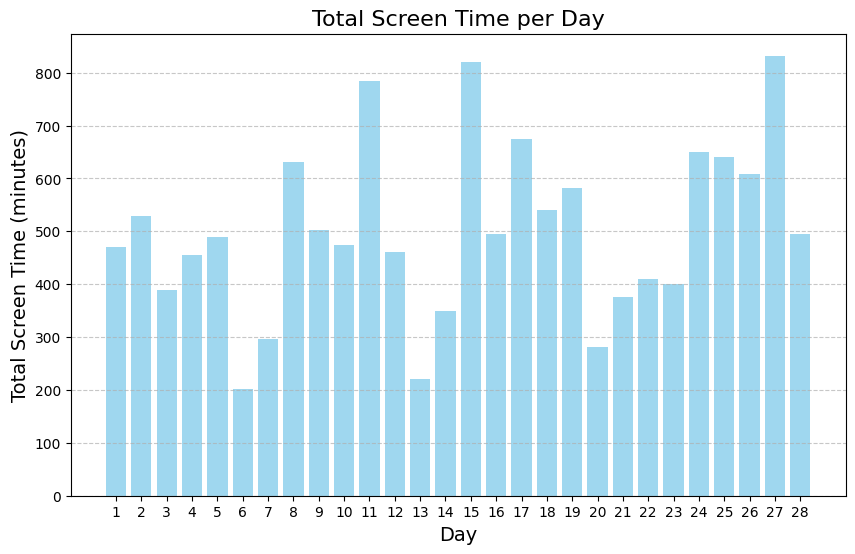

In [3]:

# Filter the data for total screen time
total_data = df[df['app'] == 'total']

# Create a bar chart for total screen time by day
plt.figure(figsize=(10, 6))
plt.bar(total_data['day'], total_data['time (minutes)'], color='skyblue', alpha=0.8)

# Customize the plot
plt.title('Total Screen Time per Day', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Total Screen Time (minutes)', fontsize=14)
plt.xticks(total_data['day'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Scatter Plot: Time/Notification Ratio

C:\Users\doguk\AppData\Local\Temp\ipykernel_70496\1496106494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data['time_per_notification'] = total_data['time (minutes)'] / total_data['notifications']


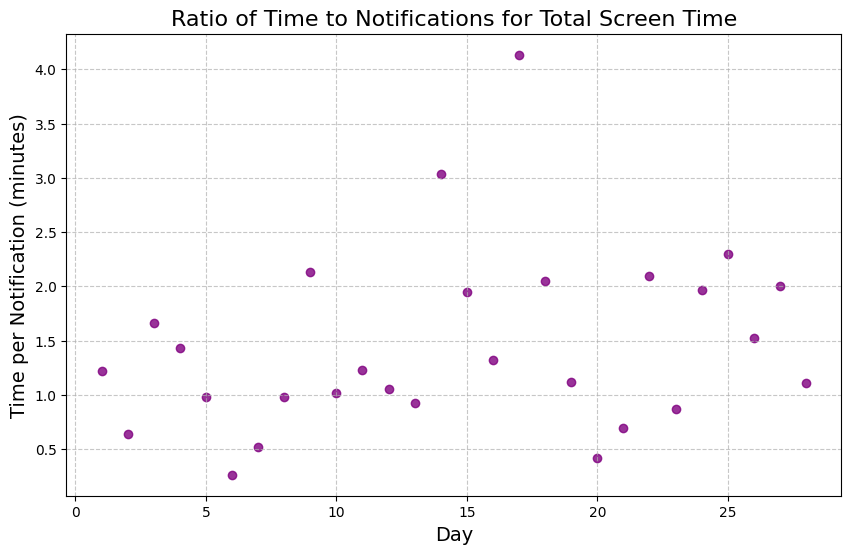

In [4]:

# Calculate the ratio of time to notifications
total_data['time_per_notification'] = total_data['time (minutes)'] / total_data['notifications']

# Handle division by zero (if any notifications are zero)
total_data = total_data[total_data['notifications'] != 0]

# Create a scatter chart for time/notification ratio
plt.figure(figsize=(10, 6))
plt.scatter(total_data['day'], total_data['time_per_notification'], color='purple', alpha=0.8)

# Customize the plot
plt.title('Ratio of Time to Notifications for Total Screen Time', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Time per Notification (minutes)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## Dual-Axis Chart: Comparison of Total Screen Time and Notifications

### Bar and Line Chart

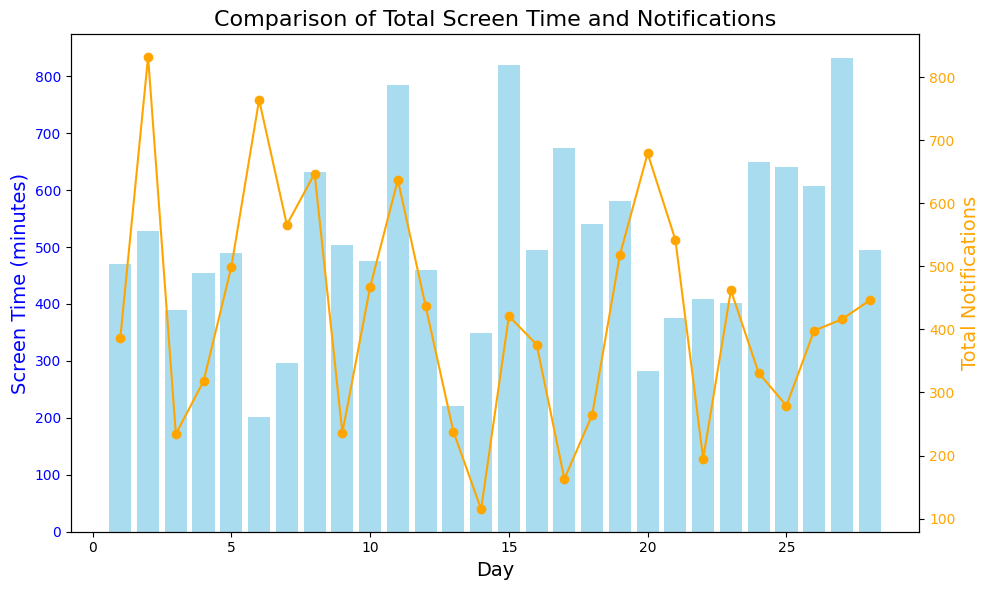

In [5]:

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for total screen time
ax1.bar(total_data['day'], total_data['time (minutes)'], color='skyblue', alpha=0.7, label='Screen Time (minutes)')
ax1.set_xlabel('Day', fontsize=14)
ax1.set_ylabel('Screen Time (minutes)', fontsize=14, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add a second y-axis for notifications
ax2 = ax1.twinx()
ax2.plot(total_data['day'], total_data['notifications'], color='orange', marker='o', label='Notifications')
ax2.set_ylabel('Total Notifications', fontsize=14, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Comparison of Total Screen Time and Notifications', fontsize=16)
fig.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Scatter Plot

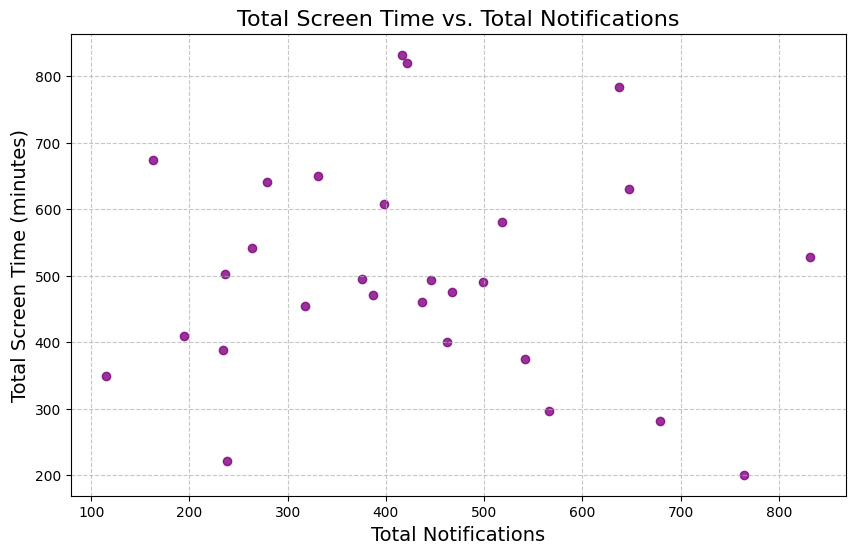

In [6]:

# Scatter plot for total screen time vs. notifications
plt.figure(figsize=(10, 6))
plt.scatter(total_data['notifications'], total_data['time (minutes)'], color='purple', alpha=0.8)

# Customize the plot
plt.title('Total Screen Time vs. Total Notifications', fontsize=16)
plt.xlabel('Total Notifications', fontsize=14)
plt.ylabel('Total Screen Time (minutes)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


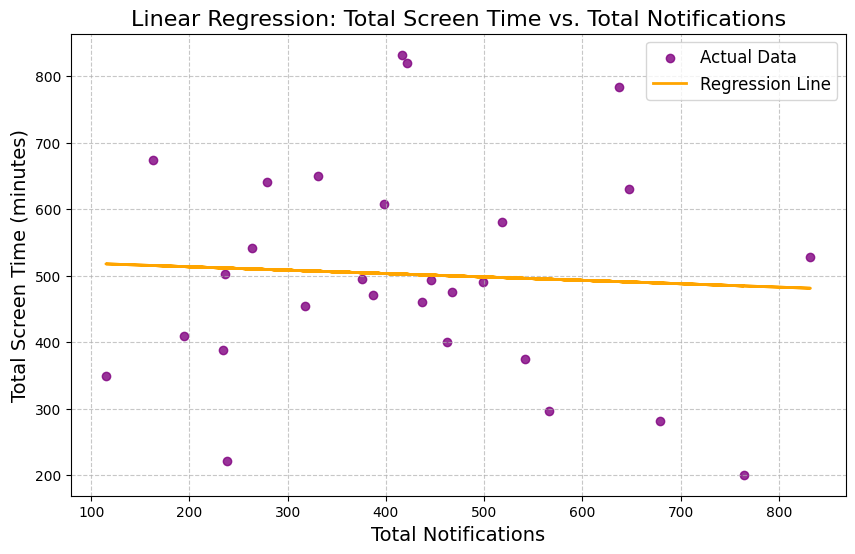

Slope: -0.0510
Intercept: 523.60
R^2 Score: 0.0031


In [8]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for linear regression
# Filter the data to remove rows with zero notifications
filtered_data = total_data[total_data['notifications'] != 0]

# X: Notifications, Y: Time (minutes)
X = filtered_data['notifications'].values.reshape(-1, 1)
Y = filtered_data['time (minutes)'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, Y)

# Generate predictions
Y_pred = model.predict(X)

# Plot the scatter plot and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['notifications'], filtered_data['time (minutes)'], color='purple', alpha=0.8, label='Actual Data')
plt.plot(filtered_data['notifications'], Y_pred, color='orange', linewidth=2, label='Regression Line')

# Customize the plot
plt.title('Linear Regression: Total Screen Time vs. Total Notifications', fontsize=16)
plt.xlabel('Total Notifications', fontsize=14)
plt.ylabel('Total Screen Time (minutes)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Print regression results
print(f"Slope: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R^2 Score: {model.score(X, Y):.4f}")
